In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 1.91 ms (started: 2021-06-17 10:56:19 +00:00)


In [ ]:
#preprocessing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

datadir = '/content/drive/MyDrive/ML/ML mini project/images'
Categories = ['car','pen','shoe','bike','helicopter']   # car = 0 , pen = 1 , shoe = 2 , bike = 3 , helicopter - 4
for i in Categories:
  class_num = Categories.index(i)   # label encoding the images
  path = os.path.join(datadir,i)    # create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    # print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(250,250,3))   # normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())   # flattening the data
    images.append(img_resized)
    target.append(class_num)
    

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 49.7 s (started: 2021-06-17 10:56:57 +00:00)


In [ ]:
flat_data

array([[0.36894118, 0.40650196, 0.0648058 , ..., 0.96619027, 0.95121773,
        0.93440408],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.0049098 , 0.        ,
        0.00098824],
       [0.63145898, 0.44322369, 0.35694918, ..., 0.48630168, 0.49022325,
        0.4706154 ],
       ...,
       [0.8832746 , 0.89503931, 0.9616746 , ..., 0.34205885, 0.3616667 ,
        0.4361765 ],
       [0.69558431, 0.82107451, 0.91820392, ..., 0.47879529, 0.59510667,
        0.50624627],
       [0.23529412, 0.5254902 , 0.78039216, ..., 0.96843765, 0.90572392,
        0.33745725]])

time: 8.08 ms (started: 2021-06-17 11:00:43 +00:00)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

time: 5.29 ms (started: 2021-06-17 11:00:49 +00:00)


<BarContainer object of 5 artists>

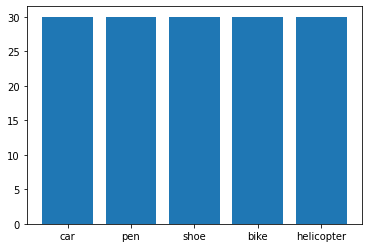

time: 195 ms (started: 2021-06-17 11:00:52 +00:00)


In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(Categories,count)

In [ ]:
# split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.6,random_state=42)

time: 239 ms (started: 2021-06-17 11:00:55 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'kernel':['rbf']},
              {'C':[1,10,100,1000],'kernel':['poly']}
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 5min 29s (started: 2021-06-17 11:00:59 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([2, 0, 3, 2, 3, 1, 3, 4, 2, 2, 3, 0, 1, 0, 0, 1, 0, 2, 1, 4, 3, 4,
       3, 4, 4, 4, 0, 4, 3, 4, 3, 0, 2, 0, 1, 4, 1, 0, 0, 1, 0, 2, 2, 0,
       0, 2, 4, 4, 3, 3, 3, 3, 2, 0, 0, 2, 0, 1, 1, 2, 4, 0, 0, 0, 3, 1,
       3, 0, 1, 0, 3, 1, 4, 3, 2, 2, 4, 1, 3, 3, 4, 1, 1, 2, 0, 1, 2, 3,
       1, 3])

time: 1.6 s (started: 2021-06-17 11:06:35 +00:00)


In [ ]:
y_test

array([2, 0, 3, 2, 2, 1, 2, 4, 2, 2, 3, 0, 1, 0, 0, 1, 3, 2, 1, 4, 0, 4,
       0, 4, 4, 4, 3, 4, 1, 1, 0, 0, 2, 0, 1, 4, 1, 0, 0, 1, 4, 2, 2, 0,
       0, 2, 4, 4, 2, 3, 3, 3, 2, 0, 4, 2, 0, 1, 1, 2, 4, 0, 0, 0, 3, 1,
       3, 3, 1, 3, 3, 1, 4, 3, 2, 2, 4, 1, 0, 3, 3, 1, 1, 2, 2, 1, 3, 0,
       1, 2])

time: 4.45 ms (started: 2021-06-17 11:06:39 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

time: 1.18 ms (started: 2021-06-17 11:06:42 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[15,  0,  1,  4,  2],
       [ 0, 17,  0,  0,  0],
       [ 0,  0, 15,  1,  0],
       [ 5,  1,  4, 10,  0],
       [ 0,  1,  0,  1, 13]])

time: 5.05 ms (started: 2021-06-17 11:06:45 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.7777777777777778

time: 3.21 ms (started: 2021-06-17 11:06:48 +00:00)


In [ ]:
import pickle   # saving the model using pickle library
pickle.dump(clf,open('img_model.p','wb'))

time: 128 ms (started: 2021-06-17 11:06:52 +00:00)


In [ ]:
model = pickle.load(open('img_model.p','rb'))

time: 93 ms (started: 2021-06-17 11:06:57 +00:00)


enter your url : https://th.bing.com/th/id/OIP.02N9uZ0uJepMwz2_nBTFwQHaFj?w=217&h=180&c=7&o=5&dpr=1.38&pid=1.7
(248, 299, 3)
PREDICTED OUTPUT: car


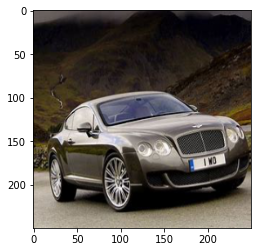

time: 2.89 s (started: 2021-06-17 11:13:16 +00:00)


In [ ]:
# testing a brand new image
flat_data = []
url = input('enter your url : ')
img = imread(url)
img_resized = resize(img,(250,250,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = Categories[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')